In [1]:
import os
import glob
import cv2
import random
import skimage
import numpy as np
import matplotlib.pyplot as plt


from skimage import morphology
from skimage import filters
from skimage import segmentation 
from skimage import measure
from skimage import color

In [2]:
print("Get file_paths.")
        
src_dir = "D:/jupyter-notebook/LiverCancer/Image_Original/"
file_paths = []

for fold in os.listdir(src_dir):
    file_paths = file_paths + [file_path for file_path in glob.glob(src_dir+fold+"/*.jpg")]

Get file_paths.


D:/jupyter-notebook/LiverCancer/Image_Original/grade0\ImageN.01.jpg


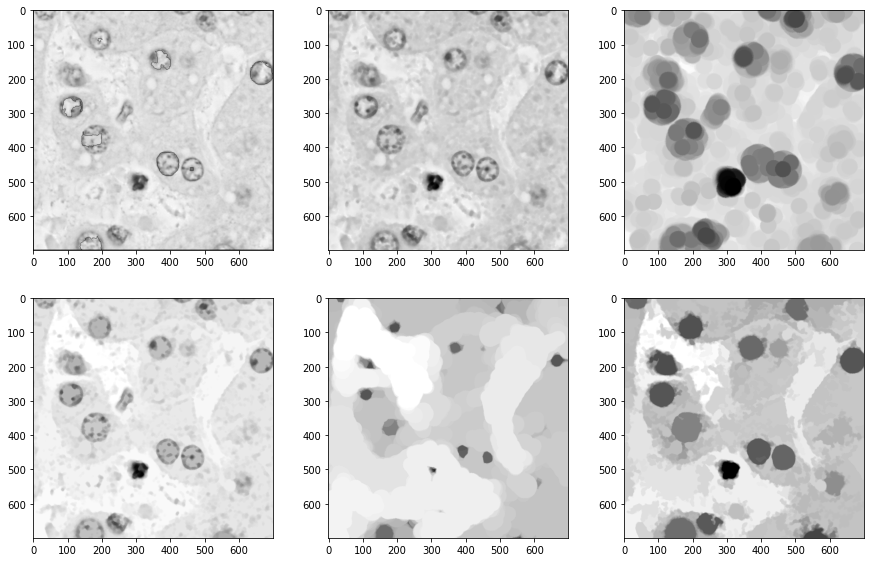

NameError: name 'sys' is not defined

In [7]:
dst_path = "D:/jupyter-notebook/LiverCancer/Image_Segmented/"

for index, file_path in enumerate(file_paths):
    
    print(file_path)
    sample_image = cv2.imread(file_path)
    image_color = sample_image[1300:2000,1000:1700,:]
    image_red = sample_image[1300:2000,1000:1700,2]
    kernel = skimage.morphology.disk(20)
    kernel_2 = skimage.morphology.disk(3)
    image_closing = skimage.morphology.closing(image_red, kernel_2)
    image_erosion = skimage.morphology.erosion(image_closing, kernel)
    image_reconstruction = skimage.morphology.reconstruction(image_erosion,image_closing).astype(np.uint8)
    image_dialtion = skimage.morphology.dilation(image_reconstruction, kernel)
    image_reconstruction_2 = skimage.morphology.reconstruction(image_dialtion, image_reconstruction, method='erosion').astype(np.uint8)
    thresh0, sure_bg, sure_fg, image = watershed(image_reconstruction_2,image_color)

    cv2.imshow('result_img', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    fig = plt.figure(figsize=(15, 15))
    ax1 = fig.add_subplot(331) 
    ax2 = fig.add_subplot(332)
    ax3 = fig.add_subplot(333)
    ax4 = fig.add_subplot(334)
    ax5 = fig.add_subplot(335)
    ax6 = fig.add_subplot(336)
    
    ax1.imshow(image_red, plt.cm.gray) 
    ax2.imshow(image_closing, plt.cm.gray) 
    ax3.imshow(image_erosion, plt.cm.gray) 
    ax4.imshow(image_reconstruction, plt.cm.gray) 
    ax5.imshow(image_dialtion, plt.cm.gray) 
    ax6.imshow(image_reconstruction_2, plt.cm.gray) 
    
    plt.show() 
    sys.exit(0)
    

In [4]:
def watershed(gray,temp):
    
    img = temp
    ret0, thresh0 = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    kernel = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(thresh0,cv2.MORPH_OPEN,kernel, iterations = 2)

    # 确定背景区域
    sure_bg = cv2.dilate(opening,kernel,iterations=3)

    # 确定前景区域
    dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
    ret1, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

    # 查找未知区域
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg,sure_fg)

    # 标记标签
    ret2, markers1 = cv2.connectedComponents(sure_fg)
    markers = markers1+1
    markers[unknown==255] = 0
    
    markers3 = cv2.watershed(img,markers)
    img[markers3 == -1] = [0,255,0]
    
    return thresh0,sure_bg,sure_fg,img


D:/jupyter-notebook/LiverCancer/Image_Original/grade0\ImageN.01.jpg


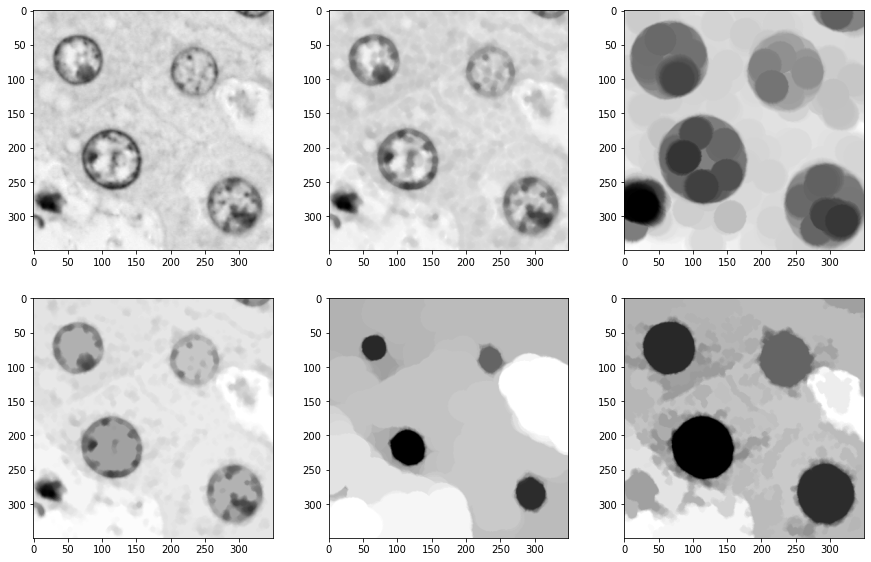

NameError: name 'sys' is not defined

In [4]:
dst_path = "D:/jupyter-notebook/LiverCancer/Image_Segmented/"

for index, file_path in enumerate(file_paths):
    
    print(file_path)
    sample_image = cv2.imread(file_path)
    image_color = sample_image[150:500,100:450,:]
    image_red = sample_image[150:500,100:450,2]
    kernel = skimage.morphology.disk(20)
    kernel_2 = skimage.morphology.disk(3)
    image_closing = skimage.morphology.closing(image_red, kernel_2)
    image_erosion = skimage.morphology.erosion(image_closing, kernel)
    image_reconstruction = skimage.morphology.reconstruction(image_erosion,image_closing).astype(np.uint8)
    image_dialtion = skimage.morphology.dilation(image_reconstruction, kernel)
    image_reconstruction_2 = skimage.morphology.reconstruction(image_dialtion, image_reconstruction, method='erosion').astype(np.uint8)
   
    cv2.imshow('result_img', image_color)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
#     sys.exit(0)

    fig = plt.figure(figsize=(15, 15))
    ax1 = fig.add_subplot(331) 
    ax2 = fig.add_subplot(332)
    ax3 = fig.add_subplot(333)
    ax4 = fig.add_subplot(334)
    ax5 = fig.add_subplot(335)
    ax6 = fig.add_subplot(336)
    
    ax1.imshow(image_red, plt.cm.gray) 
    ax2.imshow(image_closing, plt.cm.gray) 
    ax3.imshow(image_erosion, plt.cm.gray) 
    ax4.imshow(image_reconstruction, plt.cm.gray) 
    ax5.imshow(image_dialtion, plt.cm.gray) 
    ax6.imshow(image_reconstruction_2, plt.cm.gray) 
    
    plt.show() 
    sys.exit(0)
    